In [23]:
#Import required libraries
import pandas as pd
import numpy as np
import calendar
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Load the data
df = pd.read_csv('Order sales data_01.csv')
df_org = df                                  #Keep a reference of original data
df.head()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8399 entries, 0 to 8398
Data columns (total 21 columns):
Row ID                  8399 non-null int64
Order ID                8399 non-null int64
Order Date              8399 non-null object
Order Priority          8399 non-null object
Order Quantity          8399 non-null int64
Sales                   8399 non-null float64
Discount                8399 non-null float64
Ship Mode               8399 non-null object
Profit                  8399 non-null float64
Unit Price              8399 non-null float64
Shipping Cost           8399 non-null float64
Customer Name           8399 non-null object
Province                8399 non-null object
Region                  8399 non-null object
Customer Segment        8399 non-null object
Product Category        8399 non-null object
Product Sub-Category    8399 non-null object
Product Name            8399 non-null object
Product Container       8399 non-null object
Product Base Margin     8336 non-nul

In [6]:
#1. Which month of the year will companyX generate high sales?
#Convert Order date to Date format
df['Order Date'] = pd.to_datetime(df['Order Date'])

#Create a column and fetch only month from Order Date
df['Order_Month'] = df['Order Date'].dt.month
df['Order_Month'] = df['Order_Month'].apply(lambda x: calendar.month_abbr[x])

In [25]:
#Group by Month and get sum of Sales and find out highest Sales Month
highsalesmonth = df.groupby('Order_Month', as_index=False)['Sales'].sum()
highsalesmonth.sort_values('Sales', ascending=False).head(1)

In [29]:
#2. How discounts have a impact on my sales?
dfcor = df[['Discount', 'Sales', 'Day_Of_the_Month']]

In [30]:
#Calculate Correlation between Discount and Sales
dfcor.corr()

,Discount,Sales
Discount,1.000000,-0.019686
Sales,-0.019686,1.000000


There is very negligible negative correlatiob between Discount and Sales which is pretty apparent from below graph.

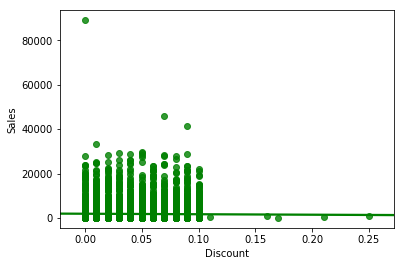

In [34]:
ax = sns.regplot(x = "Discount", y = "Sales", data=df, color="g")

In [40]:
#3. Which product name is  more popular ?

#Group by Product and get count of each product in the data
dfproductcount = df.groupby('Product Name', as_index=False)['Order ID'].count()
dfproductcount = dfproductcount.sort_values('Order ID', ascending=False).head(20)

In [63]:
#Calculate total Sales made by each product
dfproductsales = df.groupby('Product Name', as_index=False)['Sales'].sum()
dfproductsales = dfproductsales.sort_values('Sales', ascending=False).head(20)

In [65]:
#Calculate total quantity sold for each product
dfproductquantity = df.groupby('Product Name', as_index=False)['Order Quantity'].sum()
dfproductquantity = dfproductquantity.sort_values('Order Quantity', ascending=False).head(20)

In [67]:
#Select the product which is common in all three table as Most Popular product
dfproduct = pd.merge(dfproductcount, pd.merge(dfproductsales, dfproductquantity, on = 'Product Name'), on = 'Product Name')

In [68]:
dfproduct

,Product Name,Order ID,Sales,Order Quantity
0,BoxOffice By Design Rectangular and Half-Moon ...,22,104483.142,516
1,Canon PC940 Copier,18,210910.680,474


In [72]:
#Does any customer segment has affinity towards any particular product/category

#Group by Customer Segement and Product category and get the count
dfcustseg = df.groupby(['Customer Segment', 'Product Category'], as_index=False)['Order ID'].count()

In [73]:
dfcustseg

,Customer Segment,Product Category,Order ID
0,Consumer,Furniture,358
1,Consumer,Office Supplies,865
2,Consumer,Technology,426
3,Corporate,Furniture,633
4,Corporate,Office Supplies,1680
5,Corporate,Technology,763
6,Home Office,Furniture,406
7,Home Office,Office Supplies,1145
8,Home Office,Technology,481
9,Small Business,Furniture,327


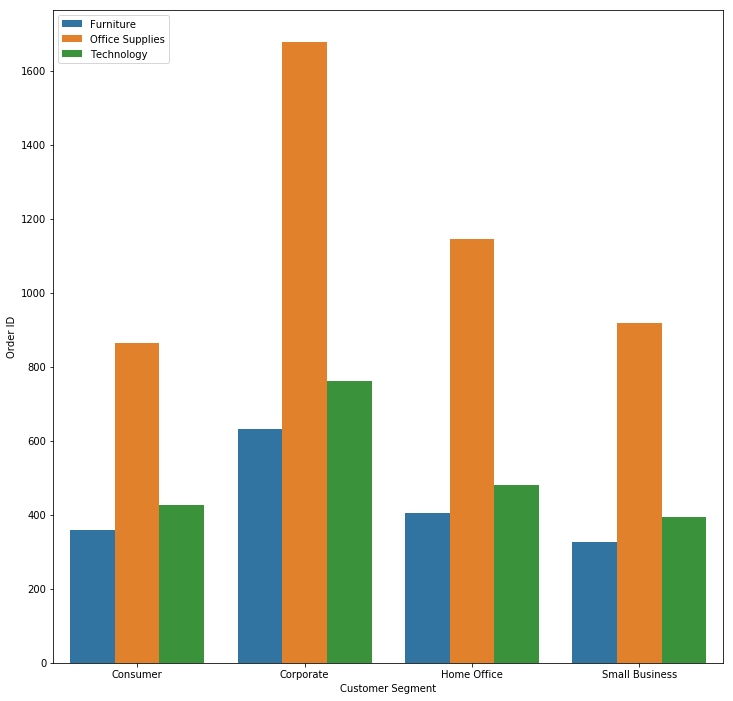

In [92]:
#Plot a graph to check any affinity between Customer Segment and Product Category
plt.figure(figsize=(12, 12))
a = sns.barplot(x = 'Customer Segment', y = "Order ID", hue = "Product Category", data = dfcustseg, ci=None)
plt.legend(loc = 'upper left')
plt.show()

Its pretty clear from graph that Office Supplies is most popular Product Category among all Customer Segments.

In [101]:
#Who all are my loyal customers? Are these customers behave different from remaining customers?
#To get loyal Customer first calculate average days betwen visits for all customers
dfloyal = df[['Order Date', 'Customer Name']]
dfloyal.head()

,Order Date,Customer Name
0,2010-10-13,Muhammed MacIntyre
1,2012-02-20,Ruben Dartt
2,2011-07-15,Liz Pelletier
3,2011-07-15,Liz Pelletier
4,2011-07-15,Liz Pelletier


In [102]:
dfloyal = dfloyal.sort_values(by = ['Customer Name', 'Order Date'], ascending=[True, True]) #Arrange data in ascending order for each customer
dfloyal = dfloyal.reset_index()
dfloyal = dfloyal.drop(columns='index')
dfloyal.head()

In [178]:
#Create a frequency column and set initial value as 0. Calculate difference between subsequent visits for each customer
dfloyal['Frequecny'] = 0
rows = df.shape[0]

for i in range(rows - 1):
    if dfloyal['Customer Name'][i + 1] == dfloyal['Customer Name'][i]:
        dfloyal['Frequecny'][i+1] = (dfloyal['Order Date'][i + 1] - dfloyal['Order Date'][i])/np.timedelta64(1, 'D')

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [187]:
dfloyal.head(20)

,Order Date,Customer Name,Frequecny,Frequency2
0,2009-07-01,Aaron Bergman,0.0,0.0
1,2009-07-07,Aaron Bergman,6.0,6.0
2,2010-07-27,Aaron Bergman,385.0,385.0
3,2010-07-27,Aaron Bergman,0.0,0.0
4,2010-07-27,Aaron Bergman,0.0,0.0
5,2010-11-09,Aaron Bergman,105.0,105.0
6,2011-05-28,Aaron Bergman,200.0,200.0
7,2009-08-15,Aaron Hawkins,0.0,0.0
8,2009-12-13,Aaron Hawkins,120.0,120.0
9,2010-05-26,Aaron Hawkins,164.0,164.0


In [189]:
#Calculate average Frequency between each visit for all customer
dfloyal['Frequecny'].mean()

95.0210739373735

In [192]:
#Create a new table to calculate average frequency betwen visits for each customer
dfloaylcust = dfloyal.groupby('Customer Name', as_index=False)['Frequecny'].mean()
dfloaylcust.head()

,Customer Name,Frequecny
0,Aaron Bergman,99.428571
1,Aaron Hawkins,72.166667
2,Aaron Smayling,78.071429
3,Adam Bellavance,103.000000
4,Adam Hart,52.333333


In [198]:
#Considering average frequency betwen visits for each customer as 120, write a query to update Loyal Customer if average frequency for each customer is <120 else update as Non loyal customer
r = dfloaylcust.shape[0]

for i in range(r-1):
    if dfloaylcust['Frequecny'][i]<=120:
        dfloaylcust['Loyal Customer'][i] = 'Loyal Customer'
    else:
        dfloaylcust['Loyal Customer'][i] = 'Non Loyal Customer'

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [200]:
dfloaylcust.head(5)

,Customer Name,Frequecny,Loyal Customer,Loyal Customer 2
0,Aaron Bergman,99.428571,Loyal Customer,Loyal Customer
1,Aaron Hawkins,72.166667,Loyal Customer,Loyal Customer
2,Aaron Smayling,78.071429,Loyal Customer,Loyal Customer
3,Adam Bellavance,103.000000,Loyal Customer,Loyal Customer
4,Adam Hart,52.333333,Loyal Customer,Loyal Customer


In [203]:
#Is there any correlation between profit and sales, if so - can you tell me what will be the profit if my sale is RS 5000 ?
dfprofitsales = df[['Profit', 'Sales']]
dfprofitsales.corr()

In [210]:
from sklearn.linear_model import LinearRegression


x = dfprofitsales['Sales']
x = x.reshape(-1, 1)
y = dfprofitsales['Profit']
y = y.reshape(-1, 1)

mod = LinearRegression().fit(x,y)

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  import sys


In [212]:
salesValue = 5000
predSales = mod.predict(salesValue)

In [228]:
print(predSales)

[[ 807.47784888]]
